<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 3</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 02. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Fraktale</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Bonuspunkte)</td></tr></table>

**Fraktale** sind faszinierende Objekte der Mathematik, die oft, aber nicht immer, selbst-ähnliche Struktur besitzen. Zwei der bekanntesten Fraktale sind die Mandelbrot-Menge, benannt nach Benoît Mandelbrot, der zugleich auch den Begriff Fraktal prägte, und die Julia-Mengen.


**Julia-Mengen** sind Teilmengen der komplexen Zahlen und oft fraktale Mengen. Sie werden erzeugt, indem man eine komplexe Zahl $z = x + yi$ initialisiert, wobei $(x, y) \in \left[-2, 2\right]\times \left[ -2, 2\right]$. Mit der Formel $z^\prime = z^2 + c$ wird nun ein Weg in der komplexen Ebene beschritten, bis die Gleichung $|z| > 2$ erfüllt. Die Anzahl der Schritte wird nun als Wert für die Ausgangskoordinate gespeichert. Aus all diesen Werten wird dann ein Bild gezeichnet, das noch vom frei wählbaren Parameter $c$ abhängt.

**Mandelbrot-Mengen** sind eng mit den Julia-Mengen verwandt. Der Parameter $c$ ist nun ebenfalls veränderlich und wird gleich dem Ausgangspunkt gewählt. Vergrößert man einen Bereich der Mandelbrot-Menge sehr stark, so erhält man eine Menge, die ähnlich der Julia-Menge mit entsprechend gewähltem $c$ aussieht. 

Nutzen Sie die untenstehenden Programmskelette, um Julia-Mengen zu erzeugen. Die Funktion `fractal_set(z, c, iterations)` soll die Anzahl der benötigten Schritte ausgeben, bis $|z| > 2$ erfüllt ist. Diese Funktion wird wiederrum für den gesamten Bildbereich durch `julia_image(c, iterations)` und `mandelbrot_image(c, iterations)` aufgerufen.

**Hinweis:** Ein guter Startpunkt für weitere Informationen sind die Wikipedia-Einträge sowohl auf Deutsch als auch auf Englisch zu Fraktalen ([de](https://de.wikipedia.org/wiki/Fraktal), [en](https://en.wikipedia.org/wiki/Fractal)), Mandelbrot-Menge ([de](https://de.wikipedia.org/wiki/Mandelbrot-Menge), [en](https://en.wikipedia.org/wiki/Mandelbrot_set)) und Julia-Mengen ([de](https://de.wikipedia.org/wiki/Julia-Menge), [en](https://en.wikipedia.org/wiki/Julia_set)).

In [1]:
function fractal_set(z, c, iterations, max=2)
    i = 0
    while abs(z) <= max
        z = z^2 + c
        i += 1
        i > iterations && break
    end
    return i
end

fractal_set (generic function with 2 methods)

In [2]:
function julia_image(c, iterations)
    width = 800
    height = 800
    image = zeros(width, height)
    xes    = linspace(-2, 2, width)
    ys     = linspace(-2, 2, height)
    
    for x in 1:width
        for y in 1:height
            z = xes[x] + ys[y]*im
            image[x, y] += fractal_set(z, c, iterations)
        end
    end
    
    return image
end 

julia_image (generic function with 1 method)

In [3]:
function mandelbrot_image(iterations)
    width  = 800
    height = 800
    image  = zeros(width, height)
    xes    = linspace(-2, 2, width)
    ys     = linspace(-2, 2, height)
    
    for x in 1:width
        for y in 1:height
            z = xes[x] + ys[y]*im
            image[x, y] += fractal_set(z, z, iterations)
        end
    end
    
    return image
end 

mandelbrot_image (generic function with 1 method)

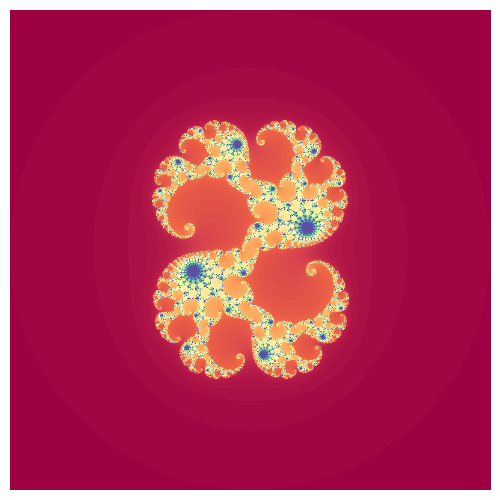

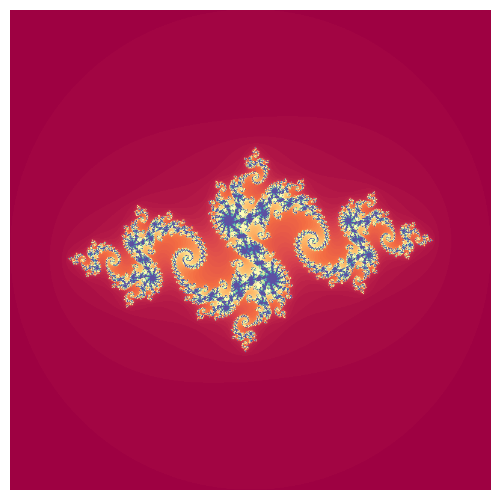

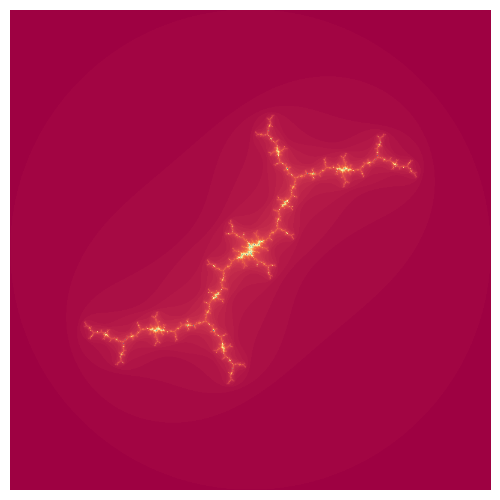

In [4]:
using PyPlot

for (c, iterations) in [(0.28 - 0.008im, 128), (-0.79 + .15im, 128), (-.162 + 1.04im, 128)]
    f = figure()
    imshow(transpose(julia_image(c, iterations)), vmin=0, vmax=iterations, cmap="Spectral")
    axis("off")
    gca()[:xaxis][:set_visible](false)
    gca()[:yaxis][:set_visible](false)
end

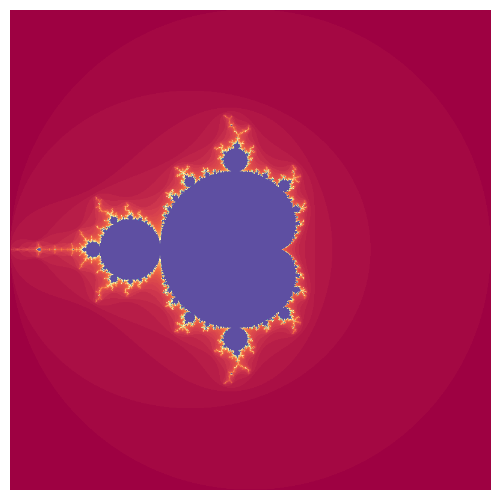

In [5]:
using PyPlot

f = figure()
mi = mandelbrot_image(80)
imshow(transpose(mi), vmin=minimum(mi), vmax=maximum(mi), cmap="Spectral")
axis("off")
gca()[:xaxis][:set_visible](false)
gca()[:yaxis][:set_visible](false)